In [34]:
import pandas as pd

import os
import shutil
import glob

import json

import numpy as np
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import requests
from urllib.parse import urlencode
import re

import requests

import easyocr

from tqdm import tqdm

from utils import generate_image

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=7860): Max retries exceeded with url: /sdapi/v1/sd-models (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f3a42145990>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [5]:
INPUT_CSV = f"/home/jjjj/Downloads/Game Icons 15.09 - with_image.csv"
OUT_PATH = "IMGS_22.11"
ALL_IMGS = "/home/jjjj/Pictures/ALL_IMGS" 

IMGS_COMPLETE = "/home/jjjj/Pictures/9_09_NEW"
IMGS_COMPLETE_2 = "/home/jjjj/Documents/new"

In [3]:
xl = pd.read_csv(INPUT_CSV)
xl

,id,external_id,provider,name,image_url
0,4235,1f148c29a3ed40e886c601e503363fdd,playngoasia,Wild Blood 2,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
1,4236,5ec1261a3b0641a3b0e76065df3abac6,playngoasia,Wild Falls,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
2,4237,abdb1a4cce7a4b218c7b6b846c065d31,playngoasia,Wild Frames,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
3,4238,a02b1de1bdea4aa89f0c1d45d1b87442,playngoasia,Wild Melon,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
4,4259,09544657a3adf3c57d875e5a102bad621e8828b3,threeoaks,The King of Heroes,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
...,...,...,...,...,...
1600,1341,ab2982dcbec79bb5731084e0cfb6220de2e504e6,ezugi,Baccarat Super 6,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
1601,7975,6d9a7194034e4e6d816ac59271aaa632,pragmaticplaylive,Blackjack 21 - Azure,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
1602,7857,2fdfa0b91267f2e0be2f32a1d582d4b8df5070b2,hogaming,N1 Roulette,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...
1603,8056,c42fd45b30704cf2a562051799490f7f,pragmaticplaylive,Speed Baccarat 8,https://imagedelivery.net/1nvGfW1exHCjskQD2_2i...


In [46]:
imgs_complete_name = [i[:-4] for i in os.listdir(IMGS_COMPLETE)]
imgs_complete_name_2 = [i[:-4] for i in os.listdir(IMGS_COMPLETE_2)]

In [48]:

for i in tqdm(os.listdir(IMGS_COMPLETE_2)):
    Image.open(
        os.path.join(IMGS_COMPLETE_2, i)
    ).save(os.path.join(ALL_IMGS, i[:-4].lower().strip().replace('`', "'") + ".png"))

for i in tqdm(os.listdir(IMGS_COMPLETE)):
    Image.open(
        os.path.join(IMGS_COMPLETE, i)
    ).save(os.path.join(ALL_IMGS, i[:-4].lower().strip().replace('`', "'") + ".png"))

100%|██████████| 103/103 [00:02<00:00, 41.08it/s]


In [7]:
imgs_complete_name = [i[:-4] for i in os.listdir(ALL_IMGS)]

In [8]:
for i in range(len(xl)):
    i = xl.loc[i]
    if not isinstance(i['name'], str):
        continue
    if i['provider'] in ["pragmaticplaylive", "hogaming", "xprogaming", "ezugi", "vivogaming"]:
        continue
    name = i['name'].strip().lower().replace('`', "'")
    
    if i['provider'] == 'relaxgamingslots':
        name = name.replace('mobile', '').strip()
    
    if name in imgs_complete_name:
        continue
    else:
        print(name, i['provider'])

dragon valor


In [27]:
img = Image.open("/home/jjjj/Pictures/ALL_IMGS/wild water.png")

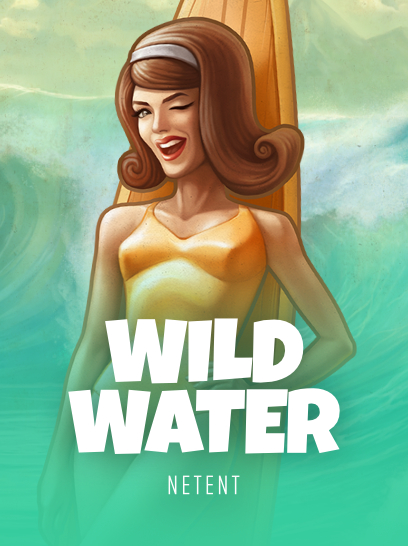

In [28]:
img

In [29]:
eader = easyocr.Reader(['en'])

In [30]:
new_img = img.copy()
result = eader.readtext(np.array(new_img))

In [31]:
frame_around_size = 10

In [32]:
h = 546

In [33]:
mask = Image.new("L", img.size)
draw = ImageDraw.Draw(mask)
frame_around_size = int(frame_around_size)

for i in result:
    i = i[0]
    mean_value = np.array(i).mean(axis=0)
    c = []
    for j in i:
        c.append([])
        if j[0] < mean_value[0]:
            c[-1].append(j[0] - frame_around_size)
        else:
            c[-1].append(j[0] + frame_around_size)

        if j[1] < mean_value[1]:
            c[-1].append(j[1] - frame_around_size)
        else:
            c[-1].append(j[1] + frame_around_size)

    if np.array(c)[:, 1].min() < h // 2:
        continue
    draw.polygon([tuple(x) for x in c], fill="white")

mask = np.array(mask).astype(np.uint8)

Image.fromarray(mask).save("mask_delete_text.png")
img.save("img_delete_text.png")



In [ ]:
generate_image(
        img, mask, model, vae_name, prompt, negative_prompt, sampler, steps, cfg_scale, denoising_strength, batch_size
    )